For this project, you’ll get to work as a data analyst alongside the curriculum team at Codecademy to help us improve the learner experience. While this data is simulated, it is similar to real data that we might want to investigate as Codecademy team members!

### Inspect the data

In [1]:
import pandas as pd
import numpy as np

We’re imagining that this data was collected as part of an experiment to understand factors that contribute to learner performance on a quiz. The data contains three columns:

#### score: 
student score on a quiz
#### completed: 
the number of other content items on Codecademy that the learner has completed prior to this quiz
#### lesson: 
indicates which lesson the learner took directly before the quiz ('Lesson A' or 'Lesson B')

In [2]:
df = pd.read_csv('codecademy.csv')
df.head()

,score,completed,lesson,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,82.7,35.0,Lesson A,NaN,NaN,NaN
1,65.2,31.0,Lesson A,NaN,NaN,NaN
2,55.3,33.0,Lesson A,NaN,NaN,NaN
3,28.8,25.0,Lesson B,NaN,NaN,NaN
4,31.2,18.0,Lesson B,NaN,NaN,NaN


In [3]:
df = df[['score', 'completed', 'lesson']]
df.head()

,score,completed,lesson
0,82.7,35.0,Lesson A
1,65.2,31.0,Lesson A
2,55.3,33.0,Lesson A
3,28.8,25.0,Lesson B
4,31.2,18.0,Lesson B


### Model the relationship between quiz score and number of completed content items

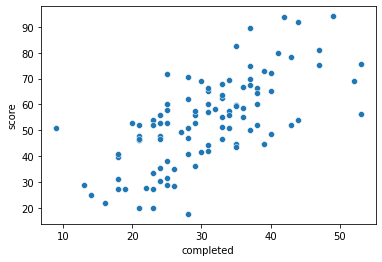

<Figure size 432x288 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a scatter plot of score (y-axis) against completed (x-axis) to see the relationship between quiz score and number of completed content items
sns.scatterplot(x = 'completed', y = 'score', data = df)
plt.show()
plt.clf()

#### Is there a relationship between these two variables, and does it appear to be linear?

There is a strong linear relationship between score and completed lessons. the more lessons you complete the higher your score becomes


In [5]:
import statsmodels.api as sm
# Create and fit a linear regression model that predicts score using completed as the predictor. Print out the regression coefficients
model = sm.OLS.from_formula('score ~ completed', data = df)
results = model.fit()
print(results.params)

Intercept    13.214113
completed     1.306826
dtype: float64


### Interpretation
The student's score is 13.2 when he or she does not complete any prior lessons. However,  the student who has completed an additional prior lesson gets 1.3 additional points 

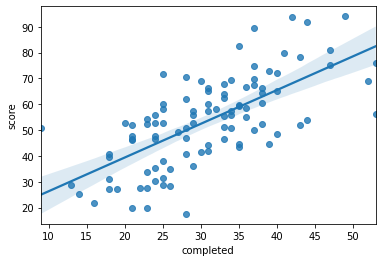

<Figure size 432x288 with 0 Axes>

In [6]:
# Plot a scatter plot of score (y-axis) against completed (x-axis) to see the relationship between quiz score and number of completed content items 
# but this time add the regression line on top of the plot
sns.regplot(x = 'completed', y = 'score', data = df)
plt.show()
plt.clf()

In [7]:
# Use your model to calculate the predicted quiz score for a learner who has previously completed 20 other content items.

# print(results.params[0] + results.params[1] *20)
results.predict({'completed': 20})

0    39.350625
dtype: float64

In [8]:
# predict the entire completed column
fitted_values = results.predict(df)
fitted_values

0     58.953009
1     53.725706
2     56.339358
3     45.884753
4     36.736974
        ...    
95    53.725706
96    82.475869
97    43.271102
98    40.657450
99    51.112055
Length: 100, dtype: float64

In [9]:
residuals = df.score - fitted_values
residuals

0     23.746991
1     11.474294
2     -1.039358
3    -17.084753
4     -5.536974
        ...    
95     6.274294
96    -6.675869
97   -15.871102
98     5.942550
99     6.187945
Length: 100, dtype: float64

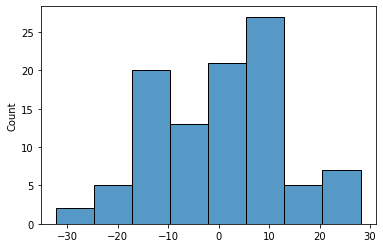

<Figure size 432x288 with 0 Axes>

In [10]:
# Check the normality assumption for linear regression by plotting a histogram of the residuals
sns.histplot(residuals)
plt.show()
plt.clf()

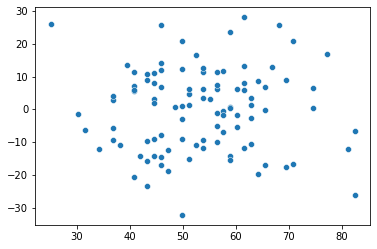

<Figure size 432x288 with 0 Axes>

In [11]:
# Check the homoscedasticity assumption for linear regression by plotting the residuals (y-axis) against the fitted values (x-axis).
sns.scatterplot(x= fitted_values, y=residuals)
plt.show()
plt.clf()

The homoscedasticity assumption is met. there are no patterns

### Do learners who take lesson A or B perform better on the quiz?

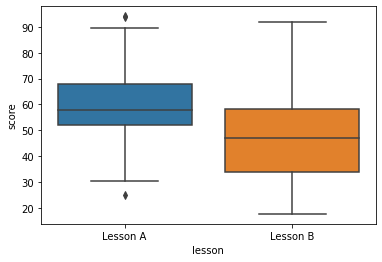

<Figure size 432x288 with 0 Axes>

In [12]:
sns.boxplot(x='lesson', y='score', data=df)
plt.show()
plt.clf()

Lesson A appears to be doing better than lesson B

In [13]:
# Create and fit a linear regression model that predicts score using lesson as the predictor. Print out the regression coefficients.
model = sm.OLS.from_formula('score ~ lesson', df)
results = model.fit()
print(results.params)

Intercept             59.220
lesson[T.Lesson B]   -11.642
dtype: float64


In [14]:
# Calculate and print out the mean quiz scores for learners who took lesson A and lesson B.

les_sco = df.groupby('lesson').agg({'score': 'mean'}).reset_index()
les_sco

,lesson,score
0,Lesson A,59.220
1,Lesson B,47.578


In [15]:
sco = les_sco.iloc[:, 1]
sco

0    59.220
1    47.578
Name: score, dtype: float64

In [16]:
# print mean difference
sco[0] - sco[1]

11.641999999999996

The mean difference is the same as the lesson B slope

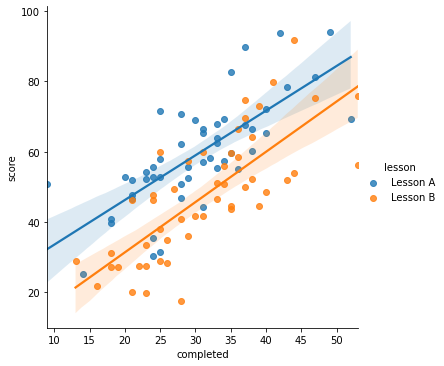

<Figure size 432x288 with 0 Axes>

In [17]:
sns.lmplot(x='completed', y='score', hue='lesson', data=df)
plt.show()
plt.clf()